In [1]:
%matplotlib notebook

### Instituto Tecnológico de Costa Rica

#### Profesor: Sergio Arriola Valverde.

#### Taller de Comunicaciones Electricas.

Integrantes:
- Jorge Andrés Brenes Alfaro.
- Pablo César Calderón Piedra.
- Kimberly María Carvajal Méndez.
- Jason Steven Valverde Picado.

# Visualización de Datos

En el presente documento se desarrolla la parte de visualización del proyecto, donde se observa la señal original obtenida de la prueba de Ecostress y la señal después del proceso de transmisión y recepción.

Además, se realiza el gráfico del BER producido por la etapa del canal. Por último, se lleva acabo una comparación entre la señal real y la obtenida con el proceso realizado

## Importación de Librerías

In [2]:
#!pip install reportlab
#!pip install spotpy

In [3]:
import time
from spotpy.objectivefunctions import bias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter

# Señal Original vs Señal Recuperada

<IPython.core.display.Javascript object>


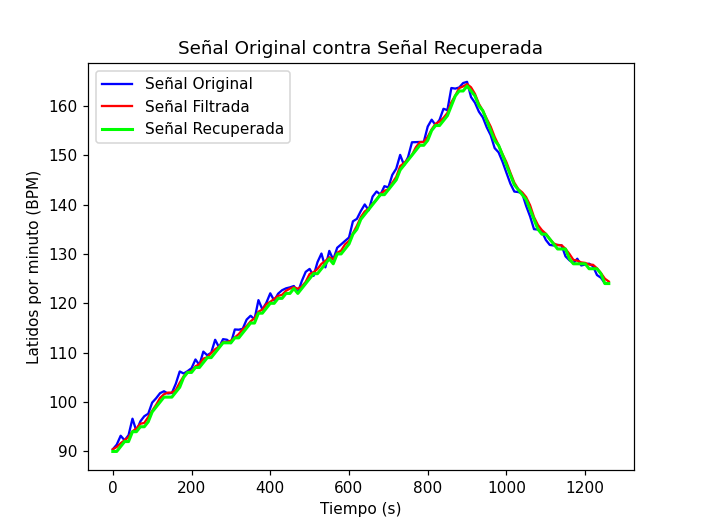

In [4]:
Signals = np.array(pd.read_excel('Senalfiltrada.xlsx'))
Datos_deco = np.array(pd.read_excel('Datadeco.xlsx'))
BPM_obt = Signals[:,2]
BPM_deco = Datos_deco[:,0]
BPM_filt = Signals[:,3]
Tiempo = Signals[:,1]

plt.figure(1)
plt.plot(Tiempo,BPM_obt,'b',linewidth=1.5, label='Señal Original')
plt.plot(Tiempo,BPM_filt,'r',linewidth=1.5,label='Señal Filtrada')
plt.plot(Tiempo,BPM_deco,'lime',linewidth=2,label='Señal Recuperada')

plt.title('Señal Original contra Señal Recuperada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Latidos por minuto (BPM)')
plt.legend()
plt.show()
plt.savefig('orivsrec.png')

## Zonas de Entrenamiento

En esta sección se busca encontrar las zonas de entrenamiento de acuerdo a la frecuencia cardiaca en donde dichas zonas se observan en el siguiente cuadro:

| Zonas de Entrenamiento |            Frecuencia Cardiaca           | Percepción del esfuerzo |
| :--------------------: | :--------------------------------------: | :---------------------: |
| Zona 1: Calentamiento  |           FC < 65% * $FC_{máx}$          |             2           |
| Zona 2: Quema Grasa    | 65% * $FC_{máx}$ < FC < 80% * $FC_{máx}$ |            3-4          |
| Zona 3: Aeróbica       | 80% * $FC_{máx}$ < FC < 85% * $FC_{máx}$ |             7           |
| Zona 4: Anaeróbica     | 85% * $FC_{máx}$ < FC < 95% * $FC_{máx}$ |            8-9          |
| Zona 5: Extrema        |           FC > 95% * $FC_{máx}$          |             10          |

Para determinar la frecuencia cardíaca máxima, se debe restar la edad a 220. En este caso el paciente tiene 32 años, por lo que su frecuencia cardiaca máxima es 188 BPM.

In [5]:
# Parámetros
FC=188
Zona_1 = 0.65*FC
Zona_2 = 0.80*FC
Zona_3 = 0.85*FC
Zona_4 = 0.95*FC
zona = 1
Z1 = [0]
Z2 = []
Z3 = []
Z4 = []
Z5 = []

# Seleción de zonas
for i in range(len(BPM_deco)):
    if (zona == 1):
        if (BPM_deco[i]>Zona_1):
            zona = 2
            Z1.append(i)
            Z2.append(i)
    elif (zona == 2):
        if (BPM_deco[i]<Zona_1):
            zona = 1
            Z1.append(i)
            Z2.append(i)
        if (BPM_deco[i]>Zona_2):
            zona = 3
            Z2.append(i)
            Z3.append(i)
    elif (zona == 3):
        if (BPM_deco[i]<Zona_2):
            zona = 2
            Z2.append(i)
            Z3.append(i)
        if (BPM_deco[i]>Zona_3):
            zona = 4
            Z3.append(i)
            Z4.append(i)
    elif (zona == 4):
        if (BPM_deco[i]<Zona_3):
            zona = 3
            Z3.append(i)
            Z4.append(i)
        if (BPM_deco[i]>Zona_4):
            zona = 5
            Z4.append(i)
            Z5.append(i)
    elif (zona == 5):
        if (BPM_deco[i]<Zona_4):
            zona = 4
            Z4.append(i)
            Z5.append(i)
    if (i == len(BPM_deco)-1):
        if (zona == 1):
            Z1.append(i)
        elif (zona == 2):
            Z2.append(i)
        elif (zona == 3):
            Z3.append(i)
        elif (zona == 4):
            Z4.append(i)
        elif (zona == 5):
            Z5.append(i)
        
print('Indices de las Zonas de Entrenamiento')
print('Zona de Entrenamiento 1:',Z1)
print('Zona de Entrenamiento 2:',Z2)
print('Zona de Entrenamiento 3:',Z3)
print('Zona de Entrenamiento 4:',Z4)
print('Zona de Entrenamiento 5:',Z5)

Indices de las Zonas de Entrenamiento
Zona de Entrenamiento 1: [0, 46, 47, 48]
Zona de Entrenamiento 2: [46, 47, 48, 77, 99, 126]
Zona de Entrenamiento 3: [77, 86, 94, 99]
Zona de Entrenamiento 4: [86, 94]
Zona de Entrenamiento 5: []


<IPython.core.display.Javascript object>


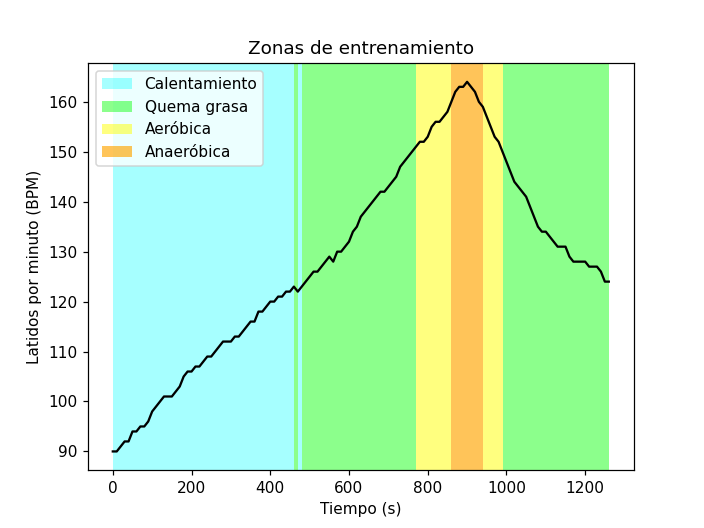

In [6]:
plt.figure(2)
plt.plot(Tiempo,BPM_deco,'k',linewidth=1.5)  #Gráfica de BPM

# Se pintan las zonas de entrenamiento
j=0
cant=int(len(Z1)/2-1)
while (j<=cant):
    k=j*2
    if (j==0):
        plt.axvspan(10*Z1[k],10*Z1[k+1],facecolor='cyan',alpha=0.35,label='Calentamiento')
    else:
        plt.axvspan(10*Z1[k],10*Z1[k+1],facecolor='cyan',alpha=0.35)
    j+=1
    
j=0
cant=int(len(Z2)/2-1)
while (j<=cant):
    k=j*2
    if (j==0):
        plt.axvspan(10*Z2[k],10*Z2[k+1],facecolor='lime',alpha=0.45,label='Quema grasa')
    else:
        plt.axvspan(10*Z2[k],10*Z2[k+1],facecolor='lime',alpha=0.45)
        
    j+=1
            
j=0
cant=int(len(Z3)/2-1)
while (j<=cant):
    k=j*2
    if (j==0):
        plt.axvspan(10*Z3[k],10*Z3[k+1],facecolor='yellow',alpha=0.5,label='Aeróbica')
    else:
        plt.axvspan(10*Z3[k],10*Z3[k+1],facecolor='yellow',alpha=0.5)
    j+=1
          
cant=int(len(Z4)/2-1)
j=0
while (j<=cant):
    k=j*2
    if (j==0):
        plt.axvspan(10*Z4[k],10*Z4[k+1],facecolor='orange',alpha=0.65,label='Anaeróbica')
    else:
        plt.axvspan(10*Z4[k],10*Z4[k+1],facecolor='orange',alpha=0.65)
    j+=1
            
cant=int(len(Z5)/2-1)
j=0
while (j<=cant):
    k=j*2
    if (j==0):
        plt.axvspan(10*Z5[k],10*Z5[k+1],facecolor='red',alpha=0.75,label='Extrema')
    else:
        plt.axvspan(10*Z5[k],10*Z5[k+1],facecolor='red',alpha=0.75)
    j+=1
            
plt.title('Zonas de entrenamiento')
plt.xlabel('Tiempo (s)')
plt.ylabel('Latidos por minuto (BPM)')
plt.legend()
plt.show()
plt.savefig('zonasdeentrenamiento.png')

## Gráfico del BER

Se obtienen los datos generados en el bloque de canal, los cuales se encuentran en un archivo BER.xlsx para codificación Hamming 7-4 y BER2.xlsx para codificación Hamming 15-11. Dichos datos son: SNR(dB) y BER.

<IPython.core.display.Javascript object>


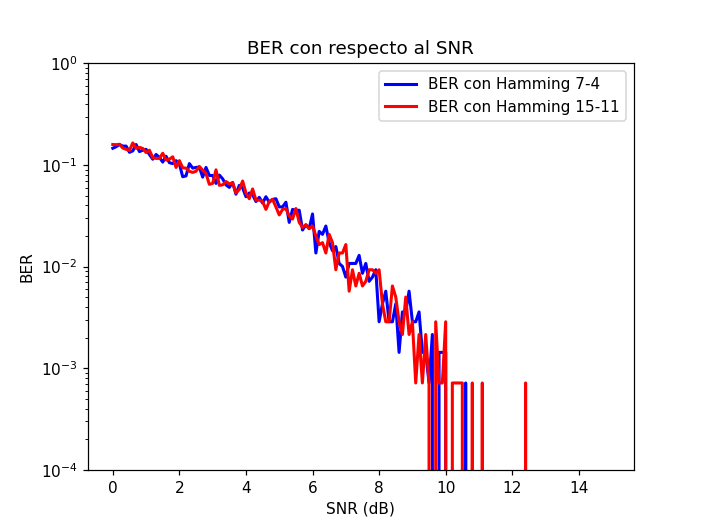

In [7]:
canal = np.array(pd.read_excel('BER.xlsx'))
canal2 = np.array(pd.read_excel('BER2.xlsx'))
SNRdB = canal[:,0]
BER = canal[:,1]    # BER generado por Hamming 7-4.
BER2 = canal2[:,1]  # BER generado por Hamming 15-11.

plt.figure(3)
plt.plot(SNRdB,BER, color='b', linewidth=2, label='BER con Hamming 7-4')
plt.plot(SNRdB,BER2, color='r', linewidth=2, label='BER con Hamming 15-11')
plt.title('BER con respecto al SNR')
plt.xlabel('SNR (dB)')
plt.ylim([0.0001,1])
plt.ylabel('BER')
plt.yscale('log')
plt.legend()
plt.show()
plt.savefig('bersnr.png')

## Gráfico de Latidos por Minutos (BPM)
Se extraen los datos de los latidos por minutos obtenidos tras el proceso de transmisión y recepción y se realiza una comparación con los datos crudos para validar que tan fiable es el proceso realizado

<IPython.core.display.Javascript object>


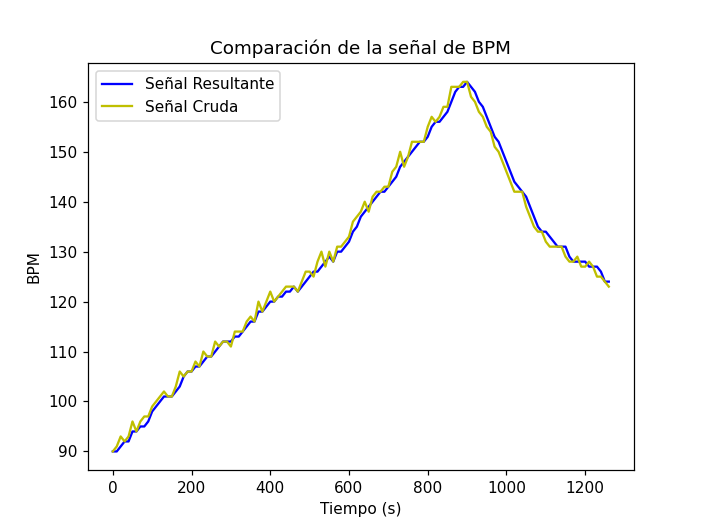

In [8]:
val_crudo = np.array(pd.read_excel('SenalCruda.xlsx'))  # Señal cruda.
BPM = Datos_deco[:,0]                                   # BPM de la señal recibida.
BPM_crudo = val_crudo[:,1]                              # BPM crudos.

plt.figure(4)
plt.plot(Tiempo,BPM,color='b', linewidth=1.5, label='Señal Resultante')
plt.plot(Tiempo,BPM_crudo, color='y', linewidth=1.5, label='Señal Cruda')
plt.title('Comparación de la señal de BPM')
plt.xlabel('Tiempo (s)')
plt.ylabel('BPM')
plt.legend()
plt.show()
plt.savefig('compBPM.png')

## Calculo de RMSE y Pbias

In [9]:
# Error Cuadrático Medio (MSE)
RMSE = round(np.square(np.subtract(BPM_crudo,BPM)).mean(),3)
print('El valor del error de cuadrático medio (MSE) es de: ',RMSE,'latidos.')

# Pbias
pbias = bias(BPM_crudo,BPM)
print ('El sesgo porcentual es: ',round(pbias,4),'%')

El valor del error de cuadrático medio (MSE) es de:  1.811 latidos.
El sesgo porcentual es:  0.2677 %


## Guardar en PDF

In [57]:
c = canvas.Canvas("Visualizacion.pdf",pagesize=letter)
c.setFont("Times-Roman", 12)
c.drawString(50, 750, "Gráfica de datos originales vs datos obtenidos")
c.drawString(350, 750, "Gráfica de las zonas de entrenamiento")
c.drawString(50, 500, "Gráfica BER vs SNR")
c.drawString(350, 500, "Gráfica de la señal resultante vs señal cruda")
c.drawString(215, 250, "Valores obtenidos de MSE y PBias")
c.drawString(180,230,"El valor del error cuadrático medio (MSE) es de:")
c.drawString(420, 230,str(RMSE))
c.drawString(450,230, "latidos")
c.drawString(240,210,"El sesgo porcentual es:")
c.drawString(360, 210, str(round(pbias,4)))
c.drawString(400,210, "%")
c.drawString(50,125,"Integrantes:")
c.drawString(50,100,"Jorge Andrés Brenes Alfaro.")             
c.drawString(50,75,"Pablo César Calderón Piedra.")
c.drawString(50,50,"Kimberly María Carvajal Méndez.")
c.drawString(50,25,"Jason Steven Valverde Picado.")
c.line(20,740,580,740)
c.line(20,490,580,490)
c.line(20,245,580,245)
c.drawImage('orivsrec.png', 30, 530, 280, 200)
c.drawImage('zonasdeentrenamiento.png', 320, 530, 280, 200)
c.drawImage('bersnr.png', 30, 280, 280, 200)
c.drawImage('compBPM.png', 320, 280, 280, 200)
c.drawImage('logo_tec.jpg', 315, 10, 300, 70)
c.save()